##  Part I - **Ford GoBike System Data Analysis and Visualization**


### **By Olayiwola Idris**

**Introduction**
-  This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
- Bay Area Bike Share is a company that provides on-demand bike rentals for customers in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose. Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city. Users pay for the service either through a yearly subscription or by purchasing 3-day or 24-hour passes. Users can make an unlimited number of trips, with trips under thirty minutes in length having no additional charge; longer trips will incur overtime fees. The dataset initially consist of 183412 rows and 16 columns. It was later reduced to 174952  rows and 12 columms after wrangling while I concentrated on  Duration (seconds), Start Time and Date , End Time and Date, User Type , Member Year of Birth , Member Gender for visualization.
The source data (Ford GoBike System Data) is available at : https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv.


<b> Importing, Gathering and cleaning dataset.

In [43]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time
import requests
import os
import tweepy
import requests
import pandas as pd
import json
import math
import matplotlib
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from PIL import Image 
from io import BytesIO
import re
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [44]:
# Import the fordgobike CSV file into a DataFrame
bikes = pd.read_csv('201902_fordgobike_tripdata.csv')


In [45]:
# high-level overview of data shape and composition
print(bikes.shape)
print(bikes.info())


(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

In [46]:
bikes.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [47]:
bikes.keys()

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [48]:
bikes_clean = bikes.copy()

In [49]:
#check number of missing values in each column
bikes_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

**Check if there is duplicate rows inthe data set**

In [50]:
#check duplicate rows
sum(bikes_clean.duplicated())


0

No duplicate rows

**Checking number of missing values in each column**

In [51]:
#check number of missing values in each column
bikes_clean.isnull().sum()


duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64


**Remove all NaN/None values in the dataframe**


In [52]:
#remove all NaN values in the dataframe
bikes_clean.dropna(inplace=True)

**Changing member_birth_year, start_time, end_time datatype to datetime**


In [53]:
# Changing member_birth_year, start_time and end_time datatype to datetime
#bikes_clean.member_birth_year = pd.to_datetime(bikes_clean.member_birth_year)
bikes_clean.start_time = pd.to_datetime(bikes_clean.start_time)
bikes_clean.end_time = pd.to_datetime(bikes_clean.end_time)


**Checking the dataframe to confirm the cleaning of the data**

<b> Define
- Remove unuseful column

In [54]:
# Here, we perform various Data Cleaning operations like :
# 1. We drop 'NaN' values 
# 2. Remove various insignificant features

bikes_clean.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
bikes_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No


In [55]:
bikes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
dtypes: datetime64[ns

In [56]:
print(bikes_clean.shape)


(174952, 12)


In [57]:
bikes_clean.describe()


,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,136.604486,4482.587555,1984.803135
std,1642.204905,111.648819,111.335635,1659.195937,10.118731
min,61.000000,3.000000,3.000000,11.000000,1878.000000
25%,323.000000,47.000000,44.000000,3799.000000,1980.000000
50%,510.000000,104.000000,101.000000,4960.000000,1987.000000
75%,789.000000,239.000000,238.000000,5505.000000,1992.000000
max,84548.000000,398.000000,398.000000,6645.000000,2001.000000


**What is the structure of your dataset?**
After a previous wranging data, there are 174952  bike trips with 12 features:
- Time of trip: duration_sec, start_time, end_time:
- Ids: bike_id;
- stations:  start_station_id, start_station_name, end_station_name, end_station_id,;
- User: user_type, member_gender, member_birth_year; 
- Other: bike_share_for_all_trip.

**What is/are the main feature(s) of interest in your dataset?**
- I will be checking the customer profile.
- What is the average duration of trips?
- Does weather(with regard to months or seasons) impact the trip duration?
- What is the impact or dependency of the above insights on whether a user is a subscriber or a customer?

**What features in the dataset do you think will help support your investigation into your feature(s) of interest?**
- I expect that Trip Duration (seconds), Start Time and Date , End Time and Date, User Type , Member Year of Birth , Member Gender can affect usertype and duration of trips. 


**Univariate Exploration**
In this section, first I comprare transformations of trips duration and than I investigate distributions of individual variables regarding outliers, cleaning and preparation of data.

 **Question 1:** What is the Gender distribution ?



**Visualization with pie chart**

Text(0, 0.5, '')

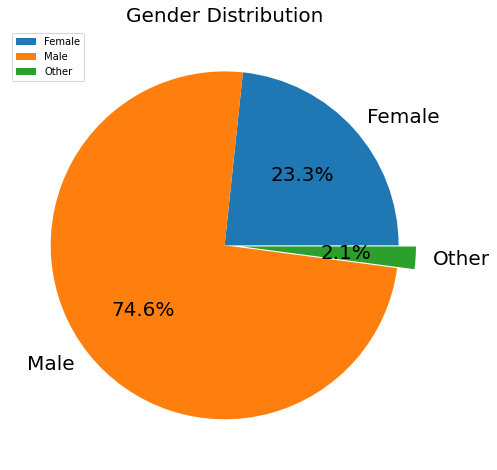

In [58]:
#Pie chart for Gender distribution
pie = bikes_clean.groupby('member_gender').count()[['bike_id']]
pie.rename(columns={'bike_id': 'member_gender'}, inplace=True)
pie['source_percentage'] = pie.member_gender / pie.member_gender.sum() * 100
pie['source_percentage'].plot.pie(figsize=(10,8), autopct='%1.1f%%', explode=(0,0,0.1), fontsize=20)
plt.title("Gender Distribution", {'fontsize': 20})
plt.legend(["Female", "Male", "Other"])
plt.ylabel("")

**Observation** 
- It is observed that almost three-quater (74.6%) of the gender are male, while less than one-quater(23.3%) is female. Other occupies 2.1% of the distributuion

 **Question 2:** What is the user distribution ?
 <br>
<br>
**Visualization with pie chart**

Text(0, 0.5, '')

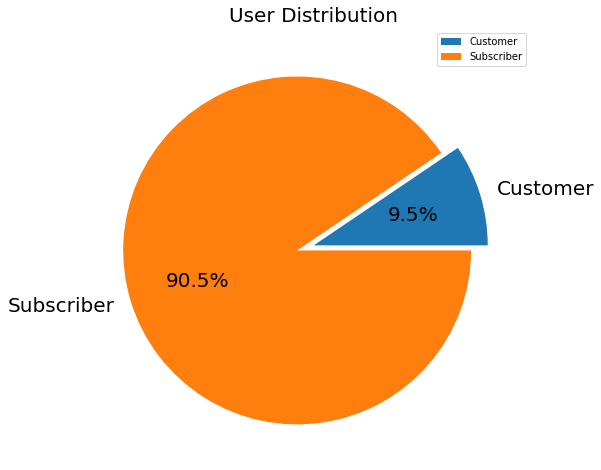

In [59]:
#Pie chart for Gender distribution
pie = bikes_clean.groupby('user_type').count()[['bike_id']]
pie.rename(columns={'bike_id': 'user_type'}, inplace=True)
pie['source_percentage'] = pie.user_type / pie.user_type.sum() * 100
pie['source_percentage'].plot.pie(figsize=(10,8), autopct='%1.1f%%', explode=(0,0.1), fontsize=20)
plt.title("User Distribution", {'fontsize': 20})
plt.legend(["Customer", "Subscriber"])
plt.ylabel("")

**Observation** 
- It is observed that  (90.5%) of the users are subscriber, while (9.5%) are Customer.

 **Question 3:** What is the Gender distribution ?

**Visualization with bar chart**

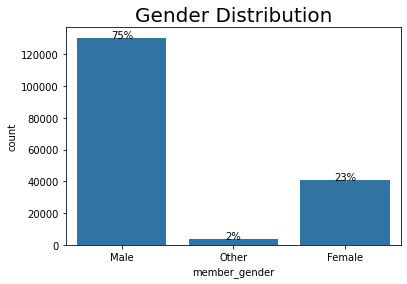

In [60]:
# create the plot 
base_color = sb.color_palette()[0]
sb.countplot(data = bikes_clean, x = 'member_gender', color = base_color)

# add annotations
n_points = bikes_clean.shape[0]
cat_counts = bikes_clean['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.title("Gender Distribution", {'fontsize': 20})


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.00f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')

**Observation** 
- It is observed that almost three-quater (75%) of the gender are male, while less than one-quater(23%) is female. Other occupies 2% of the distributuion

 **Question 4 :** What is distribution of various Trip Duration ?"

**Visualization**

Text(0, 0.5, 'Frequency')

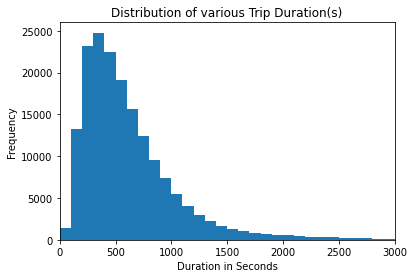

In [61]:
# Here we plot the distribution of trip durations.

binedges = np.arange(0, bikes_clean['duration_sec'].max() + 100 , 100)
plt.hist(data = bikes_clean , x = 'duration_sec' , bins = binedges)
plt.xlim(0,3000)
plt.title('Distribution of various Trip Duration(s)')
plt.xlabel('Duration in Seconds')
plt.ylabel('Frequency')

**Observation** 
- It is observed that the distribution skewed right. with peaks around 500 seconds

 **Question 5:** What is the Relatonsship between the member year of birth and Number of trips?

**Visualization**

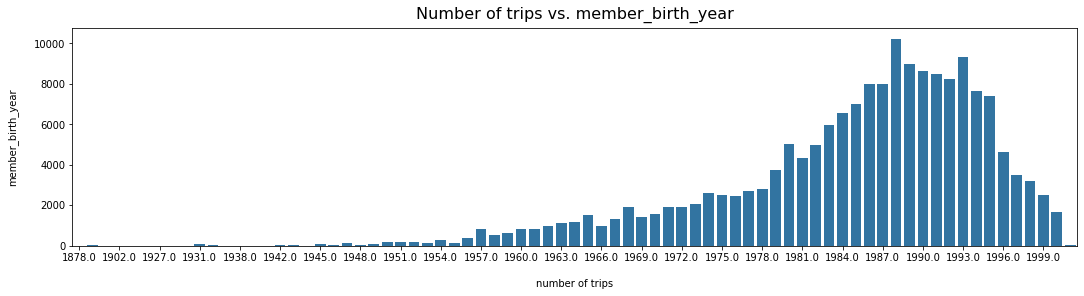

In [62]:
#'member_birth_year':['1881-1890', '1891-1990', '1901-1910','1911-1920','1921-1930', '1931-1940', '1941-1950', '1951-1960','1961-1970', '1971-1980', '1981-1990', '1991-2000']}

bikes["member_age_new"] = np.where(bikes["member_birth_year"] >= 100, 100,  bikes["member_birth_year"] )

# create the plot 
plt.figure(figsize = [18,4])
base_color = sb.color_palette()[0]
sb.countplot(data = bikes, x = 'member_birth_year', color = base_color)


# add annotations
#n_points = bikes.shape[0]
#cat_counts = bikes['member_age'].value_counts()
#locs, labels = plt.xticks() # get the current tick locations and labels

# ensure that the labels are created:
plt.draw()
# get x tick labels and position
loc, label = plt.xticks()
# set the xticks for every second (original) xtick
plt.xticks(loc[::3],label[::3])   

plt.title('Number of trips vs. member_birth_year', fontsize=16, y=1.015)
plt.ylabel("member_birth_year", labelpad=16)
plt.xlabel('number of trips', labelpad=16)


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points) 

**Observation** 
- It is observed that the distribution skewed right peak number of trip  in 1988

 **Question 6:** What is the Distribution of Start Stations in respect to the station id ?

**Visualization**

In [63]:
bikes_clean.start_station_id.value_counts()

58.0     3649
67.0     3408
81.0     2952
21.0     2711
3.0      2620
         ... 
234.0       9
51.0        7
224.0       4
300.0       3
344.0       2
Name: start_station_id, Length: 329, dtype: int64

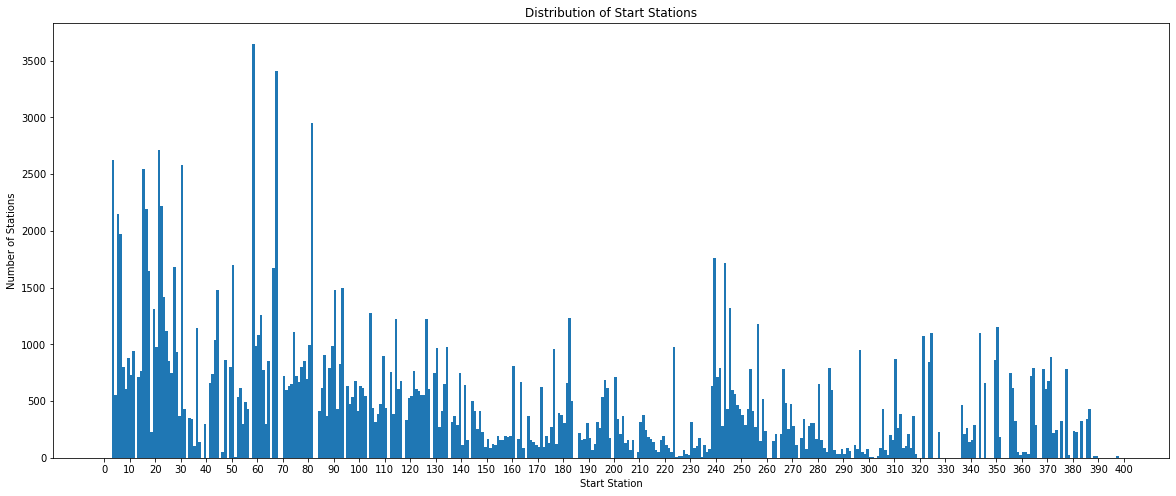

In [64]:
# Plotting start station id distribution.
binsize = 1
bins = np.arange(0, bikes_clean['start_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 401, 10))
plt.hist(data = bikes_clean.dropna(), x = 'start_station_id', bins = bins)
plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations')
plt.show()

**Observation** 
- It is observed that  start station around 58 has the highest number of trip.

 **Question 7:** What is the Distribution of End Stations in respect to the station id ?

**Visualization**



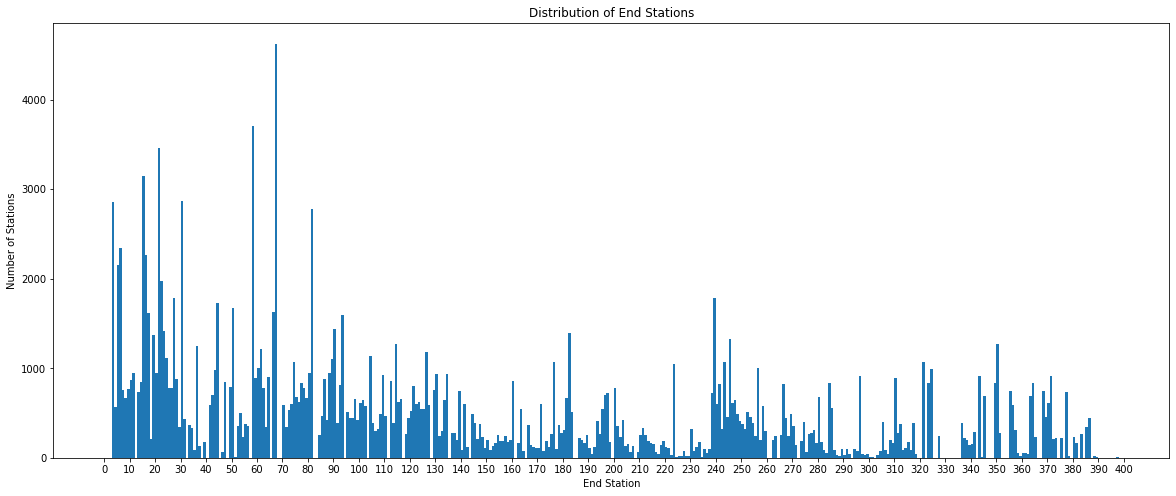

In [65]:
# Plotting end station id distribution.
binsize = 1
bins = np.arange(0, bikes['end_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 401, 10))
plt.hist(data = bikes.dropna(), x = 'end_station_id', bins = bins)
plt.title('Distribution of End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Stations')
plt.show()

**Observation** 
- It is observed that  start station around 67 has the highest number of trip.

**Bivariate Exploration**
- In this section, I investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).



 **Question 8:** What is the Relationship between the  member_birth_year and user_type using different plots?

**Visualization**


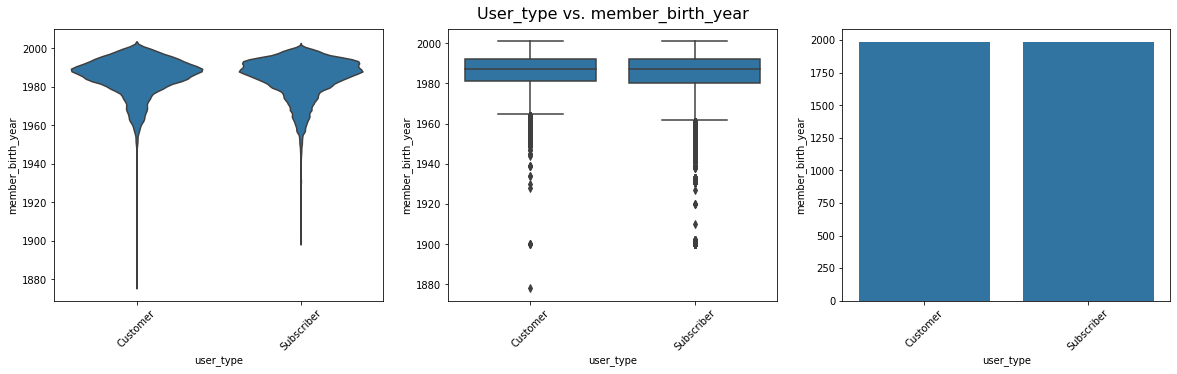

In [66]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]


# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=bikes, y='member_birth_year', x='user_type', inner = None,
              color = base_color)
plt.xticks(rotation = 45); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=bikes, y='member_birth_year', x='user_type', color = base_color)
plt.xticks(rotation = 45);
plt.title('User_type vs. member_birth_year', fontsize=16, y=1.015)

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=bikes, y='member_birth_year', x='user_type', color = base_color)
plt.xticks(rotation = 45);





**Observation** 
- from the visualization we can see that both violinplot and boxplot shows the customer Member birth year less than 1965 are outliers while subscriber Member birth year less than 1960 are outliers. Also there has been customer user_type since 1880 while subscriber user_type started around 1900.
<br>

 

In [67]:
bikeman = bikes.member_birth_year.value_counts().tail(10)
bikeman

1901.0    6
1920.0    3
1938.0    3
1944.0    2
1934.0    2
1928.0    1
1878.0    1
1930.0    1
1910.0    1
1927.0    1
Name: member_birth_year, dtype: int64

 **Question 9:** What is the distribution of member_birth_year among the member gender?

**Visualization**


Text(0.5, 1.015, 'member_birth_year vs. member gender')

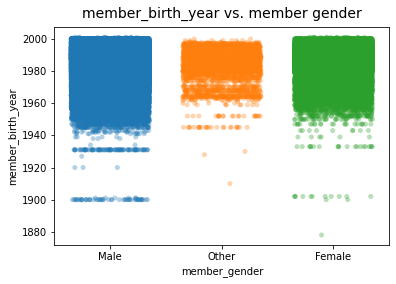

In [68]:
# create a numeric variable from the string 'member_age' 
# variable
bikes['member_birth_year'] = bikes.member_birth_year.astype(float)
# scatterplot (jittered) - age and gender
sb.stripplot(data = bikes, x = 'member_gender', y = 'member_birth_year',
           jitter = 0.35 , alpha =  1/3);
plt.title('member_birth_year vs. member gender', fontsize=14, y=1.015)

**Observation**
- It is observe that Male and female member birth year has major range between 1900, the female member birth year has an outlier in the year 1880. Other has a member birth year cluster between 1950 to 2000.



 **Question 10:** What is the Gender distribution with the time?"

**Visualization**


Text(0.5, 0, 'duration_sec')

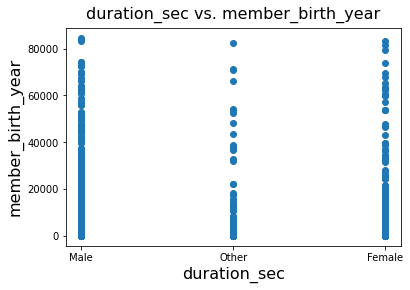

In [69]:
plt.scatter(data = bikes_clean, x = 'member_gender',y = 'duration_sec')
plt.title('duration_sec vs. member_birth_year', fontsize=16, y=1.015)
plt.ylabel("member_birth_year", fontsize=16)
plt.xlabel('duration_sec', fontsize=16)


**Observation** 
- It is observed that male duration is relatively higher than female duration while other is lower than both. 
<br>



In [70]:
bikes_clean.dtypes


duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
end_station_id                    float64
end_station_name                   object
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object



 **Question 11:** What is the Gender distribution ?

**Visualization**


Text(0.5, 1.0, 'Member gender vs. member_birth_year')

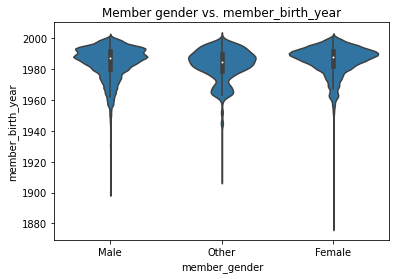

In [71]:
sb.violinplot(data = bikes_clean, x = 'member_gender', y = 'member_birth_year',color=base_color)
plt.title('Member gender vs. member_birth_year')

**Observation** 
- The violin graph shows that most occurrences of Male and Female are by person between 1980 and 1990.

<br>

 **Question 12:** What is the User distribution ?

**Visualization**


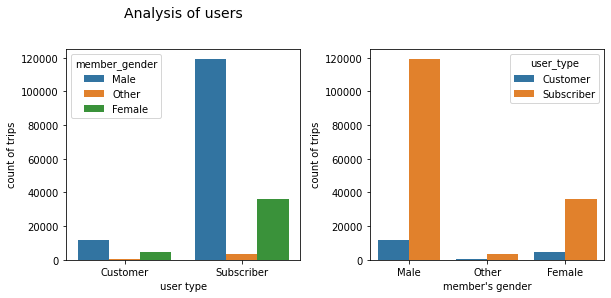

In [72]:
fig, ( ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize = [12,4])
base_color = sb.color_palette()[0]
plt.suptitle('Analysis of users', fontsize=14, y=1.025)

plt.ylabel("member_birth_year", fontsize=16)
plt.xlabel('duration_sec', fontsize=16)

ax1 = plt.subplot(1,3,2)
ax1=sb.countplot(data = bikes, x = 'user_type', hue = 'member_gender') 
ax1= plt.xlabel('user type')
ax1= plt.ylabel('count of trips')

ax2 = plt.subplot(1,3,3)
ax2=sb.countplot(data = bikes, x = 'member_gender' , hue = 'user_type')
ax2= plt.xlabel("member's gender")
ax2= plt.ylabel('count of trips')

plt.tight_layout()

**Observation** 
- The trip number of subscribers is much higher than customers.
- Male has higher trip both as subscriber and as customer.
<br>

 **Question 13:** What is the relationship between bike_share_for_all_trip and member_birth_year?

**Visualization**


#### Multivarate

In [73]:
bikes_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No



 **Question 14:** What is the relationship between bike_share_for_all_trip, duration in sec and member_birth_year?

**Visualization**


In [74]:
bikes_small = bikes.drop(columns=['duration_sec', 'bike_id'])

##numeric_vars = ['duration_sec_log','member_age']
#numeric_vars:
#quantitative_contiguous = ['duration_sec', 'duration_sec_log', 
#'duration_min', 'member_birth_year','bike_id']
#quantitative_contiguous = ['start_time', 'end_time']
#quantitative_binarious = ['bike_share_for_all_trip']

#categoric_vars:
#categoric_ordinal = [ 'user_type', 'member_gender', 'member_birth_year']

In [75]:
#samples = np.random.choice(bikes_small.shape[0], 2000, replace = False)
#bikes_samp2000 = bikes_small.loc[samples,:]
samples = np.random.choice(bikes_small.shape[0], 500, replace = False)
bikes_samp500 = bikes_small.loc[samples,:]

Text(0.5, 1.015, 'Number of trips vs. member_birth_year')

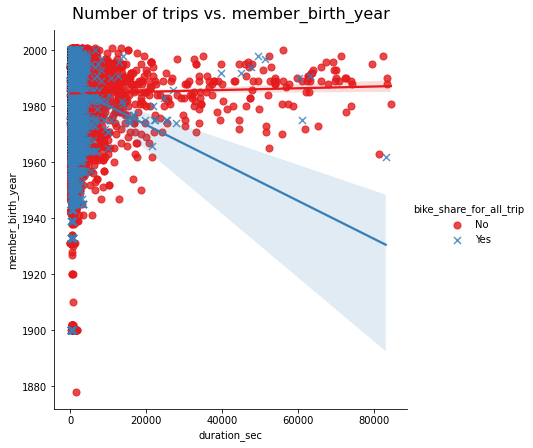

In [76]:
g = sb.lmplot(x="duration_sec", y="member_birth_year", hue="bike_share_for_all_trip", data=bikes, palette="Set1",  markers=["o","x"], scatter_kws={"s": 50}, height=6)
plt.title('Number of trips vs. member_birth_year', fontsize=16, y=1.015)


**Observation** <br>
The older the member who shares the bike for the entire trip, the longer the trip.




 **Question 15:** What is the relationship between bike_share_for_all_trip, duration in sec and member_birth_year?

**Visualization**

Text(0.5, 1.015, 'Relationship between Duration, User_type and Member_birth_year')

<Figure size 432x432 with 0 Axes>

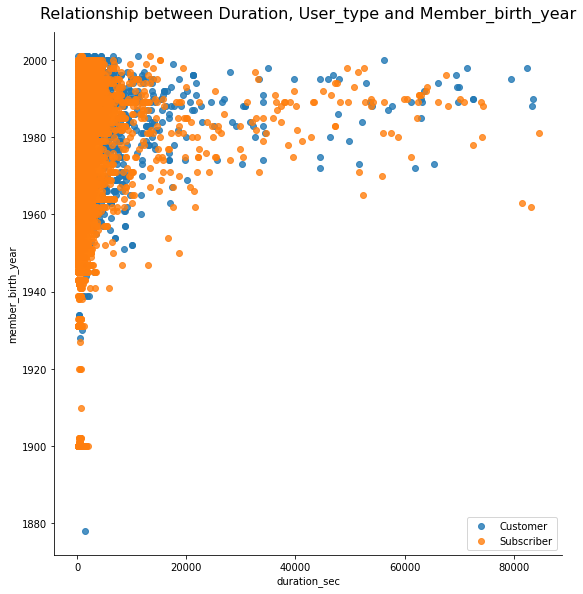

In [77]:
plt.figure(figsize = [6, 6])
#numeric_vars = ['duration_sec_log','member_age']
#categoric_vars = ['weekdays_start', 'user_type', 'member_gender']

# Use the 'hue' argument to provide a factor variable
sb.lmplot( x="duration_sec", y="member_birth_year", data=bikes, fit_reg=False, hue='user_type', 
          legend=False,x_jitter=.75,height = 8)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.title('Relationship between Duration, User_type and Member_birth_year', fontsize=16, y=1.015)

**Observation** <br>
- Customer users are a bit older than the subscriber users.



 **Question 16:** What is the relationship between bike_share_for_all_trip, duration in sec and member_birth_year?

**Visualization**

Text(0.5, 1.015, 'Relationship between Duration, member_gender and Member_birth_year')

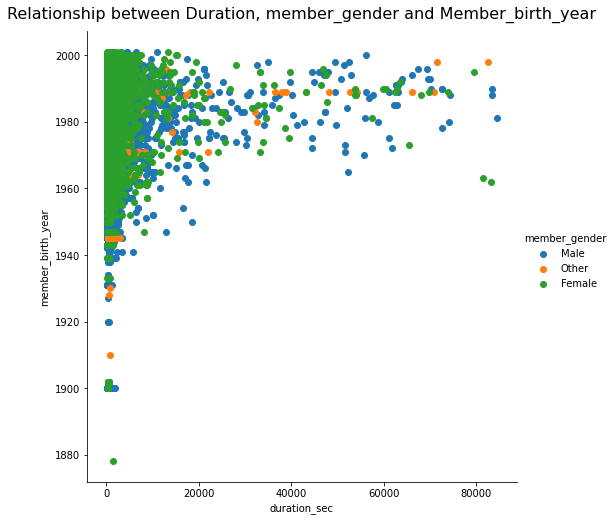

In [78]:
g = sb.FacetGrid(data = bikes, hue = 'member_gender', height = 7)
g.map(plt.scatter, 'duration_sec', 'member_birth_year')
g.add_legend()
plt.title('Relationship between Duration, member_gender and Member_birth_year', fontsize=16, y=1.015)

**Observation** <br>
- Female was the first to go for the trip. 
- Male trip durations are longer than Females trip duration and other.  


### **Multivariate Exploration**
- The main thing I want to explore in this part of the analysis is how the two categorical measures gender and user type play into the relationship between trip duration and age.


 **Question 17:** What is the relationship between bike_share_for_all_trip, duration in sec and member_birth_year?"

**Visualization**

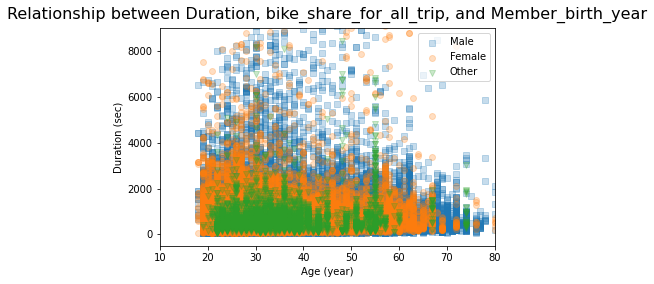

In [85]:
def scatterplot_solution_1():
    gender_markers = [['Male', 's'],['Female', 'o'],['Other', 'v']]

for gender, marker in gender_markers:
    df_gender = bikes[bikes['member_gender'] == gender]
    plt.scatter((2019 - df_gender['member_birth_year']), df_gender['duration_sec'], marker = marker, alpha=0.25)
plt.legend(['Male','Female','Other'])
plt.axis([10, 80, -500, 9000 ])
plt.xlabel('Age (year)')
plt.ylabel('Duration (sec)')
plt.title('Relationship between Duration, bike_share_for_all_trip, and Member_birth_year', fontsize=16, y=1.015)

scatterplot_solution_1()

**Observation**
- This plot does not show quit a clear picture, lets seperate all three genders into different graphs. However, the Male member are seen as outliers.




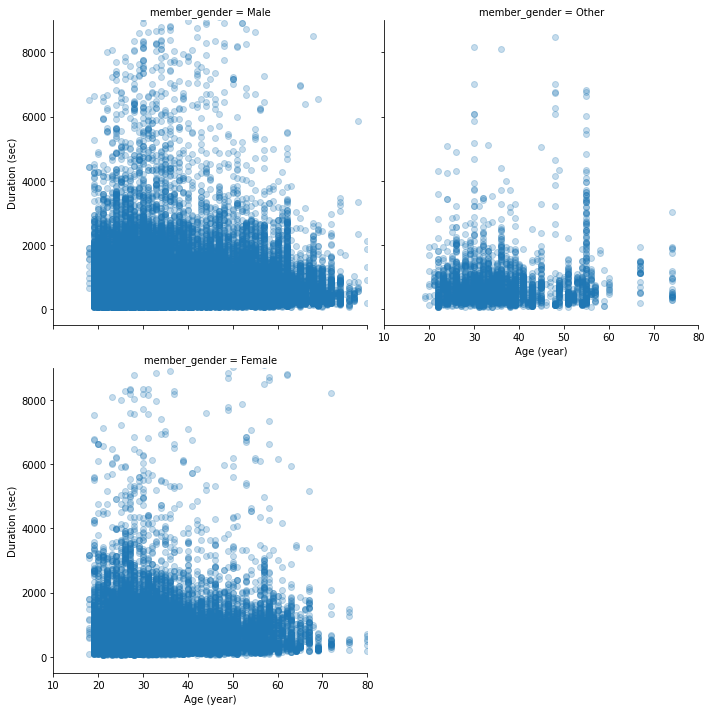

In [80]:
bikes_clean['member_birth_year'] = (2019 - bikes_clean['member_birth_year'])
genders = sb.FacetGrid(data = bikes_clean, col = 'member_gender', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
genders.map(plt.scatter, 'member_birth_year', 'duration_sec', alpha=0.25)
genders.set_xlabels('Age (year)')
genders.set_ylabels('Duration (sec)')


plt.show()

**Observation**
- Here we are seeing a jump in duration for others at an older age (around 60 years).



 **Question 18:** What is the relationship between bike_share_for_all_trip, duration in sec and member_birth_year?"

**Visualization**

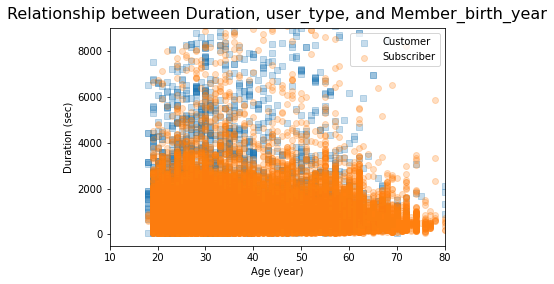

In [81]:
user_type_markers = [['Customer', 's'],['Subscriber', 'o']]

for utype, marker in user_type_markers:
    df_utype = bikes[bikes['user_type'] == utype]
    plt.scatter((2019 - df_utype['member_birth_year']), df_utype['duration_sec'], marker = marker, alpha=0.25)
plt.legend(['Customer','Subscriber'])
plt.axis([10, 80, -500, 9000 ])
plt.xlabel('Age (year)')
plt.ylabel('Duration (sec)')
plt.title('Relationship between Duration, user_type, and Member_birth_year', fontsize=16, y=1.015)

plt.show()

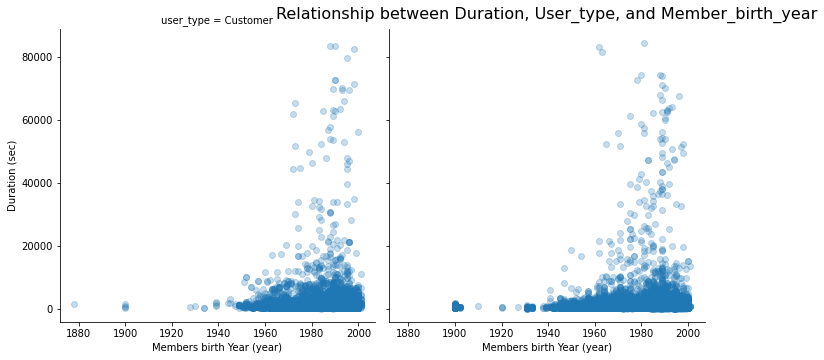

In [82]:
user_types = sb.FacetGrid(data = bikes, col = 'user_type', col_wrap = 2, size = 5 )

user_types.map(plt.scatter, 'member_birth_year', 'duration_sec', alpha=0.25)
user_types.set_xlabels('Members birth Year (year)')
user_types.set_ylabels('Duration (sec)')
plt.title('Relationship between Duration, User_type, and Member_birth_year', fontsize=16, y=1.015)

plt.show()


**Obsevation**
- In this case both Customer and Subscriber are showing similer trends for age and trip duration. But there is slight tilt to higher age for subscribers.

**Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?**

- I initially make a small Data Wrangling before making use of the data. I used pie chart to visualize the percentage of male,female and others in the member_gender column and check the subscriber and costumer in the user_type column. I compare random samples in function of member_age with bike_share_for_all_trip and duration_sec with member_age. And analysed the correlation between the numerical variables of member_birth_year and duration_sec using differnt plot.

**Were there any interesting or surprising interactions between features?**
- The older the member who shares the bike for the entire trip, the longer the trip. Subscriber users are a bit older than the customers. The male has a longer trip durations compare to the female. The correlation among member age and duration_sec_log does not present any interesting result. The duration of trip by younger people is more stable than the older, these have higher variation. 

### **Conclusion**
- The data set gave illustration of bike trip between 1988 and 1999 with their duration time, start and end stations, user_type and gender of the users.